In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import uproot
import pandas as pd
import scipy.optimize as opt
import math
import statistics as st
import os
import PyQt5
from numba import njit
import time

print(os.getcwd())
os.chdir('F:/LANL/sample_data/')
folder = 'Pr_sample/'
print(os.getcwd() + folder)

# %matplotlib qt

run_num = "13564" 
start = time.time()

#chan_enab = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
#chan_enab = np.array([0])
chan_enab = np.array([0,1,2,3,4,5,19,20,21,22,23,24])

#@jit(nopython = True)
# read_data = np.array([])
# fileLength = np.array([])
read_data = []
fileLength = []


def open_file():
    for el in chan_enab:
        f = open(folder + 'run' + run_num + "_ch" + str(el) + ".bin", 'rb')
        read_data.append(np.fromfile(file=f, dtype=np.uint16))
        #chdat = np.fromfile(file=f, dtype=np.uint16)
        #print((len(chdat)))
        #read_data = np.vstack(read_data,chdat)
        #print(len(read_data))
        f.close()
        #print((read_data))
        fileLength.append(len(read_data[-1]))
        #np.append(fileLength,len(read_data[-1]))
        #read_data = np.asarray(read_data)
    return read_data, fileLength


#np.asarray(fileLength)
open_file()
#print(read_data)
#print(type(fileLength))
#print(type(read_data))
#np.asarray(read_data)
fileLength = np.asarray(fileLength)
read_data = np.asarray(read_data) ## in detector's case, all are the same size samples, so can do read_data as np array

end = time.time()
print(end-start)
print(read_data)

F:\LANL\analysis
F:\LANL\sample_dataPr_sample/
2.3772315979003906
[[18040     0  8797 ...   593   595   594]
 [18040     0  8797 ...   601   603   601]
 [18040     0  8797 ...   596   596   597]
 ...
 [18040     0  8797 ...   614   615   616]
 [18040     0  8797 ...   626   614   613]
 [18040     0  8797 ...  2058  2058  2058]]


Store the big header for each channel in arrays

In [2]:
BoardID = []
recordLength = []
numSamples = []
eventCounter = []
decFactor = []
chanDec = []
postTrig = []
groupStart = []
groupEnd = []
timestamp= []
sizeFirstEvent = []
TTT = []

targetDict = {0: "La", 1: "Tb2O3", 2: "Yb2O3", 3: "Sm2O3", 4: "Er2O3", 5: "Ho2O3", 6: "other"}
foilDict = {0: "TBD", 1: "TBD", 2: "TBD", 3: "TBD", 4: "TBD", 5: "TBD", 6: "other"}

target=(read_data[0][5]&0x00F0)>>4
foil=read_data[0][5]&0x000F
targetFlag = read_data[0][5]>>8&1
foilFlag = read_data[0][5]>>9&1
spinFiltFlag = read_data[0][5]>>10&1
spinFlipFlag = read_data[0][5]>>11&1
shutterFlag = read_data[0][5]>>12&1
facilityTrigFlag = read_data[0][5]>>13&1

if targetFlag:
    target=targetDict[(read_data[0][5]&0x00F0)>>4]
    
else:
    target = "empty"
    
    
if foilFlag:
    foil=foilDict[read_data[0][5]&0x000F]
else:
    foil = "empty"

for i in range(0,len(chan_enab)):
    BoardID.append(read_data[i][9]>>8)
    recordLength.append(((read_data[i][9]&0x00FF)<<16)+read_data[i][8])
    numSamples.append(((read_data[i][11]&0x00FF)<<16)+read_data[i][10])
    eventCounter.append(read_data[i][6]+(read_data[i][7]<<16))
    BoardID.append(read_data[i][9]>>8)  
    decFactor.append(read_data[i][11]>>8)
    chanDec.append(read_data[i][13]>>8)
    postTrig.append(read_data[i][15]>>8)
    groupStart.append(((read_data[i][13]&0x00FF)<<16)+read_data[i][12])
    groupEnd.append(((read_data[i][15]&0x00FF)<<16)+read_data[i][14])
    
    timestamp.append(read_data[i][16]+(read_data[i][17]<<16)+(read_data[i][18]<<32)+(read_data[i][19]<<40))  
    sizeFirstEvent.append(read_data[i][0]+(read_data[i][1]<<16))
    TTT.append(read_data[i][2]+(read_data[i][3]<<16)+(read_data[i][4]<<32))
    
    print("For channel " + str(chan_enab[i]) + ", BoardID is " + str(BoardID[i])
          + "; record length is " + str(recordLength[i]) + "; num Samples is " 
          + str(numSamples[i]) + "; event counter is " + str(eventCounter[i]) + "; dec factor is " + str(decFactor[i]) + "; chan dec is " 
          + str(chanDec[i]) + "; postTrig is " + str(postTrig[i]) + "; group start is " + str(groupStart[i]) + "; group end is " + str(groupEnd[i])
          + "; epoch time is " + str(timestamp[i]) +  "; first event size is " + str(sizeFirstEvent[i]) + "; and ETTT is " + str(TTT[i]) + "\n")

BoardID = np.asarray(BoardID) 
recordLength = np.asarray(recordLength)
numSamples = np.asarray(numSamples)
eventCounter = np.asarray(eventCounter)
decFactor = np.asarray(decFactor)
chanDec = np.asarray(chanDec)
postTrig = np.asarray(postTrig)
groupStart = np.asarray(groupStart)
groupEnd = np.asarray(groupEnd)
timestamp = np.asarray(timestamp)
sizeFirstEvent = np.asarray(sizeFirstEvent)
TTT = np.asarray(TTT)

print("Target is " + target)
print("Foil is " + foil)
print("Shutter is open: " + str(bool(shutterFlag)))
print("Facility t0 is on: " + str(bool(facilityTrigFlag)))
print("Spin flipper is on: " + str(bool(spinFlipFlag)))
print("Spin filter is on: " + str(bool(spinFiltFlag)))
print("Target is present: " + str(bool(targetFlag)))
print("Foil is present: " + str(bool(foilFlag)))


For channel 0, BoardID is 31; record length is 45000; num Samples is 9000; event counter is 0; dec factor is 32; chan dec is 1; postTrig is 80; group start is 7000; group end is 16000; epoch time is 1707766860; first event size is 18040; and ETTT is 8462941

For channel 1, BoardID is 31; record length is 45000; num Samples is 9000; event counter is 0; dec factor is 32; chan dec is 1; postTrig is 80; group start is 7000; group end is 16000; epoch time is 1707766860; first event size is 18040; and ETTT is 8462941

For channel 2, BoardID is 31; record length is 45000; num Samples is 9000; event counter is 0; dec factor is 32; chan dec is 1; postTrig is 80; group start is 7000; group end is 16000; epoch time is 1707766860; first event size is 18040; and ETTT is 8462941

For channel 3, BoardID is 31; record length is 45000; num Samples is 9000; event counter is 0; dec factor is 32; chan dec is 1; postTrig is 80; group start is 7000; group end is 16000; epoch time is 1707766860; first event 

Determine the time axis for each channel

In [3]:
preTime = []
startTime = []
endTime = []
resolution = []
xs = [] 

for i in range(0,len(chan_enab)):
    preTime.append((100-postTrig[i])*recordLength[i]/100)
    startTime.append((-1*preTime[i]*16*decFactor[i] + groupStart[i]*16*decFactor[i]))
    endTime.append((-1*preTime[i]*16*decFactor[i] + groupEnd[i]*16*decFactor[i]))
    resolution.append(16*chanDec[i]*decFactor[i])
    print("Pretime for channel", chan_enab[i],"is " + str(preTime[i]) + "; start time is " + str(startTime[i]) + "; end time is " + str(endTime[i]) 
          + "; resolution is " + str(resolution[i]) + "ns")
    xs.append(np.arange(startTime[i],(numSamples[i])*resolution[i]+startTime[i], resolution[i]))

#np.asarray(preTime)
#np.asarray(startTime)
#np.asarray(endTime)
#np.asarray(resolution)
xs = np.asarray(xs) ## can convert xs to np array here because all detectors same numsamples
    
#print(len(xs[2]))
#print(preTime[0]/512)

Pretime for channel 0 is 9000.0; start time is -1024000.0; end time is 3584000.0; resolution is 512ns
Pretime for channel 1 is 9000.0; start time is -1024000.0; end time is 3584000.0; resolution is 512ns
Pretime for channel 2 is 9000.0; start time is -1024000.0; end time is 3584000.0; resolution is 512ns
Pretime for channel 3 is 9000.0; start time is -1024000.0; end time is 3584000.0; resolution is 512ns
Pretime for channel 4 is 9000.0; start time is -1024000.0; end time is 3584000.0; resolution is 512ns
Pretime for channel 5 is 9000.0; start time is -1024000.0; end time is 3584000.0; resolution is 512ns
Pretime for channel 19 is 9000.0; start time is -1024000.0; end time is 3584000.0; resolution is 512ns
Pretime for channel 20 is 9000.0; start time is -1024000.0; end time is 3584000.0; resolution is 512ns
Pretime for channel 21 is 9000.0; start time is -1024000.0; end time is 3584000.0; resolution is 512ns
Pretime for channel 22 is 9000.0; start time is -1024000.0; end time is 3584000

In [4]:
import numba
from numba.typed import List
from numba import uint16, intc, uint32
from array import array
start=time.time()

@njit
def dataread(data, channels, fileLen, numSamps):
    #ys_arr = []
    numRuns = int((fileLen[0]-20-numSamps[0])/(numSamps[0]+6)+1)
    print(numRuns)
    ys_arr = np.zeros((len(channels), numRuns,numSamps[0]), dtype=np.uint16)
    ETTT_arr = np.zeros((len(channels), numRuns), dtype=np.intc)
    eventcount_arr = np.zeros((len(channels), numRuns), dtype=np.intc)
    for i in range(0,len(channels)):
        eventCount = 0
        byteCounter = 0
            #byte counter is really 2bytecounter, lol
        while byteCounter < fileLen[i]:
            if byteCounter == 0:
                ETTT_arr[i]=TTT[i]
                #ETTT_arr[i].append(TTT[i])
                eventcount_arr[i]=(eventCounter[i])
                byteCounter = 20
            else:
                ETTT_arr[i]=(data[i][byteCounter]+(data[i][byteCounter+1]<<16)+(data[i][byteCounter+2]<<32))
                eventcount_arr[i]=(data[i][byteCounter+4]+(data[i][byteCounter+5]<<16))
                byteCounter += 6
            for j in range(0, numSamps[i]):
                #if j == 0:
                    #ys_arr[i].append([])
                #print(byteCounter)
                ys_arr[i][eventCount][j]=data[i][byteCounter]
                byteCounter += 1
            eventCount += 1
    return ys_arr, ETTT_arr, eventcount_arr

#start=time.time()
#ys_arrHe, ETTT_arrHe, eventcount_arrHe  = dataread(read_data, [25], fileLength, numSamples) ##hardcoded channel 25 for He
ys_arr, ETTT_arr, eventcount_arr  = dataread(read_data, chan_enab, fileLength, numSamples) ##hardcoded channels for coils
#ys_arrtest, ETTT_arr, eventcount_arr  = dataread(read_data[1:], [12,24], fileLength[1:], numSamples[1:]) ##testing only!

end = time.time()
print('dataread from binary time: ' + str(end-start))            

#print(len(eventcount_arr))
# print('He:')
# print(len(ys_arrHe))
# print(len(ys_arrHe[0]))
#print(len(ys_arr[0]))
#print(len(ys_arr[0][0]))


5000
dataread from binary time: 2.5251972675323486


In [5]:
timeDif=[]
for i in range(0,len(chan_enab)):
    timeDif.append([])
    for j in range(len(ETTT_arr[i])-1):
        timeDif[i].append((ETTT_arr[i][j+1]-ETTT_arr[i][j])*8)
    print("Min time difference for channel", chan_enab[i], "is", min(timeDif[i]), "ns")
    print("Max time difference for channel", chan_enab[i], "is", max(timeDif[i]), "ns \n")
#print(timeDif)

Min time difference for channel 0 is 0 ns
Max time difference for channel 0 is 0 ns 

Min time difference for channel 1 is 0 ns
Max time difference for channel 1 is 0 ns 

Min time difference for channel 2 is 0 ns
Max time difference for channel 2 is 0 ns 

Min time difference for channel 3 is 0 ns
Max time difference for channel 3 is 0 ns 

Min time difference for channel 4 is 0 ns
Max time difference for channel 4 is 0 ns 

Min time difference for channel 5 is 0 ns
Max time difference for channel 5 is 0 ns 

Min time difference for channel 19 is 0 ns
Max time difference for channel 19 is 0 ns 

Min time difference for channel 20 is 0 ns
Max time difference for channel 20 is 0 ns 

Min time difference for channel 21 is 0 ns
Max time difference for channel 21 is 0 ns 

Min time difference for channel 22 is 0 ns
Max time difference for channel 22 is 0 ns 

Min time difference for channel 23 is 0 ns
Max time difference for channel 23 is 0 ns 

Min time difference for channel 24 is 0 ns
M

In [6]:
## basesub and plotting ##
baseL = 0
baseR = int(((preTime[0]-groupStart[0])*0.70)/chanDec[0])
numRuns = int((fileLength[0]-20-numSamples[0])/(numSamples[0]+6)+1)
    
sums = []
ys_basesub = [] 
legend =  ['NaI', 'R']

start = time.time()

s = 20 ## pulse to look at
t=s+1

## dont know why this is so slow ##
def plotter(ys, xs, baseR, numpoints):
    tempys_basesub = np.zeros((len(ys), numRuns,numpoints[0]), dtype=float)
    for i in range((len(ys))):
        #tempys_basesub = []
        #tempys_basesub = np.zeros((len(ys), numRuns,numpoints[0]), dtype=float)
        #tempsums =[]
        for pulse in range((len(eventcount_arr[0]))): ## all have 5000 pulses
            tempys_basesub[i][pulse]=np.subtract(ys[i][pulse], np.mean(ys[i][pulse][baseL:baseR]))
        for j in range(s, t): ## plot only interested pulses
            #ys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][200:6000]))
            #print(sum(ys_basesub[i][j])) 
            plt.plot(xs[i], tempys_basesub[i][j]) #label=legend[i]) #+str(sums[1][j])) ## sums[j] will not work for more than just TR   
            plt.axvline(xs[0][baseL], ls = '--')
            plt.axvline(xs[0][baseR], ls = '--')
            #plt.axvline(xs[0][int(((preTime[0]-groupStart[0])*0.70)/chanDec[0])], ls = '--', c ='m')
            plt.axvline(xs[0][baseR+5], ls = '--', c ='r') ## BaseR+5 line marks the beginning of the integral, until the end of samples.
#             plt.title('SF state transition' + transitions[p]) 
#             plt.xlabel("time from trigger (ns)")
#             plt.ylabel("ADC")
            plt.legend()
            
#plotter(ys_arr[9:], xs[9:], baseR, numSamples) ##plot coils

#@jit(nopython = True) ## Actually JIT seems to be slower here!
def basesub_sum(ys, baseR, numpoints): ## for coils, could be used for He but below does that
    tempys_basesub = np.zeros((len(ys), numRuns,numpoints[0]), dtype=np.float64)
    tempsums = np.zeros((len(ys), numRuns), dtype=np.float64)
    for i in range((len(ys))):
        for pulse in range((len(eventcount_arr[0]))): ## all have 5000 pulses
            tempys_basesub[i][pulse]=np.subtract(ys[i][pulse], np.mean(ys[i][pulse][baseL:baseR]))
            tempsums[i][pulse] = np.sum(tempys_basesub[i][pulse][baseR+5:-1])
    return tempys_basesub, tempsums

## got rid of xs in basesub, don't think we need them as an input 06.10.24
        
#ys_basesub, sums = basesub_sum(ys_arrtest, xs[1:3], baseRCoil, numSamples[1:3]) ##testing only!!
ys_basesub, sums = basesub_sum(ys_arr, baseR, numSamples)

ys_basesub[-1] = ys_basesub[-1]*-1 ## invert 6Li to positive signal. Comment out if not using

end = time.time()
print('plotting and/or base subtraction time: ' + str(end-start))            
#print(len(sums))
#print(sumsHe[0][20:30])
#print(sums[1][20:30])

plotting and/or base subtraction time: 3.744138240814209


## t0 aligning ##

In [9]:
## use 6Li t0 for all instead of for themselves individually

start = time.time()

NaIthresh=2000
Li6thresh=1000

threshold_array = (np.full(len(ys_basesub), NaIthresh))
threshold_array[-1] = Li6thresh

# xValues=[]
# xtimems=[]

#@njit ## numba does not support reversed, but this could change if it's slow
def find_offset(ys, thresharr):
    xCrosses = np.zeros((len(ys), numRuns)) #outer array is crossing arrays for given channel, inner array is crossing for each event
    offset = np.zeros((len(ys), numRuns), dtype=np.int32) ##offset in bins for each channel, each pulse
    modeCrosses = np.zeros((len(ys)), dtype=np.float64)
    for i in reversed(range(len(ys))):
        #xValues.append([])
        for p in range(len(ys[i])):
            xing = np.argmax(ys[i][p] > thresharr[i])
            #print(xing)
            xCrosses[i][p] = xing
        modeCrosses[i] = (st.mode(xCrosses[i])) #find the most typical crossing value for each channel
    #     xValues[i].append(np.arange(len(ys_arr[i][0])+2*extendedRange)-modeCrosses[i])
    #     xtimems.append(xValues[i][-1]*resolution[i]*10**(-6))
        for p in range(len(xCrosses[i])):
            offset[i][p] = (modeCrosses[-1] - xCrosses[i][p]) ## make sure this is the correct sign!!! 
    if (np.all(xCrosses[-1])) == False:
        raise Exception('ERROR: 6Li threshold was not reached for at least one pulse')
    return offset, xCrosses, modeCrosses
                           
offset, xCrosses, modeCrosses = find_offset(ys_basesub, threshold_array)

print((xCrosses[0]))
print(np.std(xCrosses[0]))

print(len(offset))
print(len(offset[0]))
print(offset[0][2045:2055])

end = time.time()
print('finding offset time: ' + str(end-start))            

[1999. 1997. 1998. ... 1997. 1998. 1997.]
35.828693671971905
12
5000
[ -1   1   1 336   0   0   1   2  -1   1]
finding offset time: 0.8364531993865967


#### below might be old... not sure

In [10]:
# ## extend all arrays by a value, check that the max number of offset on 6Li is less than that value ##
# start = time.time()

# extendedRange = 3 ## must be a positive value which to extend ys_arr
# if abs(max(offset[-1], key = abs)) > extendedRange: ## if the max offset of 6Li is >extendedRange, something is wrong
#     raise Exception('ERROR: largest offset greater than extended range')

# # cant use jit because np.pad is not supported
# def align_cut(ys, extendedr):
#     ys_ext = np.zeros((len(ys), len(ys[0]), len(ys[0][0])+extendedr*2), dtype=np.float64)
#     ys_cut = np.zeros((len(ys), len(ys[0]), (len(ys_ext[0][0])-((extendedr*2)+1)*2)))
#     for i in range(len(ys)):
#         for p in range(len(ys[i])):
#             #print(len(ys_basesub[i][p]))
#             ys_ext[i][p] = np.pad(ys[i][p], extendedr, 'constant', constant_values=(0))
#             ys_ext[i][p] = np.roll(ys_ext[i][p],offset[-1][p]) ## assumes 6Li at -1 position
#             #ys_cut[i][p] = ys_ext[i][p][((extendedRange*2)+1):-((extendedRange*2)+1)].copy() ## cut by 7 (if extRange == 3)
#             ys_cut[i][p] = ys_ext[i][p][((extendedr*2)+1):-((extendedr*2)+1)].copy() ## cut by 7 (if extRange == 3)
#             #print(ys_ext[i][p][0])
#             #print(ys_basesub[p][0:10])
                
#     return ys_cut

# ys_cut = align_cut(ys_basesub, extendedRange)

# checkp = 2045
# print(offset[-1][checkp]) ## checking offset for one example checkpulse
# print('original index for checkpulse: '+str(np.argmax(ys_basesub[0][checkp]> 2000))) ## we can follow the index as it changes with extension/cut
# #print('extended range index for checkpulse: '+str(np.argmax(ys_ext[0][checkp]> 2000)))
# print('cut array index for checkpulse: '+str(np.argmax(ys_cut[0][checkp]> 2000)))

# print(len(offset))
# print(len(offset[0]))
# print(offset[-1][100:150])

# print(len(ys_basesub[0][0]))
# #print(len(ys_ext[0][0]))
# print(len(ys_cut[0][0]))

# ## del ys_ext ### get rid of this variable??

# end = time.time()
# print('aligning and cutting time: ' + str(end-start))            

In [16]:
extendedRange = 3 ## must be a positive value which to extend ys_arr
if abs(max(offset[-1], key = abs)) > extendedRange: ## if the max offset of 6Li is >extendedRange, something is wrong
    raise Exception('ERROR: largest offset greater than extended range')

ys_ext = np.zeros((len(ys_basesub), len(ys_basesub[0]), len(ys_basesub[0][0])+extendedRange*2), dtype=np.float64)
ys_cut = np.zeros((len(ys_basesub), len(ys_basesub[0]), (len(ys_ext[0][0])-((extendedRange*2)+1)*2)))
xs_cut = np.zeros((len(ys_cut), len(ys_cut[0][0])))

start = time.time()

def align_cut(ys, xs_arr, extendedr):
    tempys_ext = np.zeros((len(ys), len(ys[0])+extendedr*2), dtype=np.float64)
    tempys_cut = np.zeros((len(ys), (len(tempys_ext[0])-((extendedr*2)+1)*2)))
    tempxs_cut = np.zeros(len(tempys_cut[0]))
    for p in range(len(ys)):
        tempys_ext[p] = np.pad(ys[p], extendedr, 'constant', constant_values=(0))
        tempys_ext[p] = np.roll(tempys_ext[p],offset[-1][p]) ## assumes 6Li at -1 position
        tempys_cut[p] = tempys_ext[p][((extendedr*2)+1):-((extendedr*2)+1)].copy() ## cut by 7 (if extRange == 3)
#         tempys_cut[p] = tempys_cut[p]/HeNorms[p] ## normalize by 3He integral  ## comment out if using basesub_norm
    x_cut_amt = int((len(ys[0]) - len(tempys_cut[0]))/2)
    tempxs_cut = xs_arr[x_cut_amt:-x_cut_amt].copy()
    return tempys_cut, tempxs_cut

## Below commented out for testing without t0 aligning 08.08.24 ##
for i in range(len(ys_basesub)):
    ys_cut[i], xs_cut[i] = align_cut(ys_basesub[i], xs[i], extendedRange)
        
checkp = 2045
print(offset[-1][checkp]) ## checking offset for one example checkpulse
print('original index for checkpulse: '+str(np.argmax(ys_basesub[0][checkp]> 2000))) ## we can follow the index as it changes with extension/cut
#print('extended range index for checkpulse: '+str(np.argmax(ys_ext[0][checkp]> 2000)))
print('cut array index for checkpulse: '+str(np.argmax(ys_cut[0][checkp]> 2000)))

## del ys_ext ### get rid of this variable??

end = time.time()
print('aligning and cutting time: ' + str(end-start))            

-1
original index for checkpulse: 1999
cut array index for checkpulse: 1994
aligning and cutting time: 15.69654893875122


## Useful plotting below ##

In [9]:
## simple plotting ##
## examples for thesis

# pulse = 2048

# # plt.plot(xs[1],ys_arr[1][pulse], label='NaI')
# # # plt.plot(xs[1],ys_basesub[0][pulse], label='NaI') 
# # plt.plot(xs[-1],ys_arr[-1][pulse], label='6Li') 
# NaI1 = 0
# NaI2 = 7

# plt.plot(xs[NaI1],ys_basesub[NaI1][pulse], label='NaI detector ' + str(chan_enab[NaI1]))
# plt.plot(xs[NaI2],ys_basesub[NaI2][pulse], label='NaI detector ' + str(chan_enab[NaI2]))
# plt.plot(xs[-1],ys_basesub[-1][pulse], label='6Li (inverted signal)') 

# plt.title('Example Pulses (Pr sample)') 
# plt.xlabel("time from trigger (ns)")
# plt.ylabel("ADC")
# #print(len(ys_arrHe[-1][0]))

# # plt.axvline(xs[0][baseRHe], ls = '--', c ='r')
# # plt.axvline(xs[0][Heregion[0]], ls = '--')
# # plt.axvline(xs[0][Heregion[1]], ls = '--')
# #plt.axvline(xs[1][-1], ls = '--', c ='g')
# #plt.axhline(4060, ls = '--')
# #plt.axvline(xs[0][17000], ls = '--', c ='r')

# #plt.text(1.5e7, 1200, 'test', fontsize=12)
# plt.legend()
# plt.show()

std for channel 0: 35.82869367197191
std for channel 1: 27.556045336005674
std for channel 2: 44.192110766968355
std for channel 3: 31.246881444393768
std for channel 4: 41.995645077079125
std for channel 5: 37.92293876323405
std for channel 19: 23.050583208240095
std for channel 20: 42.53754600162073
std for channel 21: 30.399326649779596
std for channel 22: 41.39055308207418
std for channel 23: 24.025571413808247
std for channel 24: 0.9421448720870904
[[391, 2048, 2066, 2209, 3721], [2876, 3266, 4055], [375, 1718, 1826, 2525, 2839, 3266, 3661, 4762, 4913, 4949], [1596, 2209, 3685], [348, 1313, 1994, 2525, 3135, 3481, 3685, 4327, 4439], [1994, 2525, 4327, 4361, 4439], [1008, 2148, 2382, 2837, 4852], [1104, 2181, 3113, 3236, 4993], [280, 723, 1439, 2898, 4074], [521, 2854, 2915, 3334, 4074], [197, 1942, 2378, 2915], []]
[]


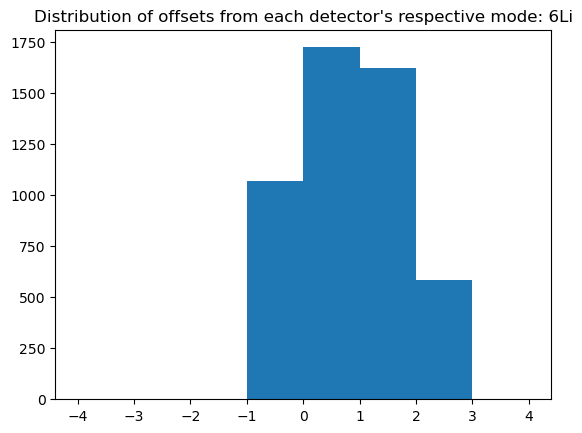

3.8731093406677246


In [17]:
## determine t0, and plot the std and outlier based on the channel ##
## this clearly shows that 6Li should be the standard for t0 ##
## examples for thesis

start = time.time()

NaIthresh=2000
Li6thresh=1000

threshold_array = (np.full(len(ys_basesub), NaIthresh))
threshold_array[-1] = Li6thresh
#print(threshold_array)

xCrosses = np.zeros((len(ys_basesub), numRuns)) #outer array is crossing arrays for given channel, inner array is crossing for each event
modeCrosses=[] #single array with one value per channel
xValues=[]
xtimems=[]
offset = np.zeros((len(ys_basesub), numRuns), dtype=np.int32) ##offset in bins for each channel, each pulse
extendedRange=3

for i in (range(len(ys_basesub))):
    xValues.append([])
    for p in range(len(ys_basesub[i])):
        xing = np.argmax(ys_basesub[i][p] > threshold_array[i])
        #print(xing)
        xCrosses[i][p] = xing
    modeCrosses.append(st.mode(xCrosses[i])) #find the most typical crossing value for each channel
#     xValues[i].append(np.arange(len(ys_arr[i][0])+2*extendedRange)-modeCrosses[i])
#     xtimems.append(xValues[i][-1]*resolution[i]*10**(-6))
    for p in range(len(xCrosses[i])):
        offset[i][p] = (modeCrosses[i] - xCrosses[i][p]) ## make sure this is the correct sign!!!

outliers = []
bindif = 4 ## set how strict your # of bins deviation for outliers

for i in range(len(xCrosses)):
    outliers.append([])
    for p in range(len(xCrosses[i])):
        if offset[i][p] > 3:
            outliers[i].append(p)
    print('std for channel ' + str(chan_enab[i]) + ': '+ str(np.std(offset[i])))
    #print(np.max(offset[i]))

print(outliers)
print(np.argwhere(offset[0] > 1713.0))

choff = -1 ## which channel to look at for histogram
a = offset[choff]
#print(a)

_ = plt.hist(a, bins=(np.arange(min(a)-3,max(a)+3,1)))  # arguments are passed to np.histogram

plt.title("Distribution of offsets from each detector's respective mode: 6Li")
plt.show()

end = time.time()
print(end-start)            

(12, 5000)


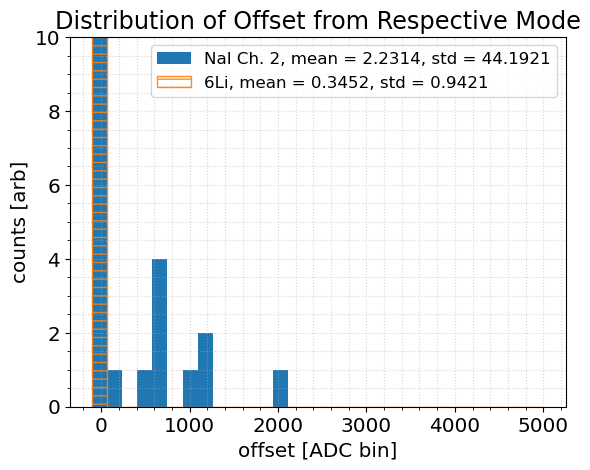

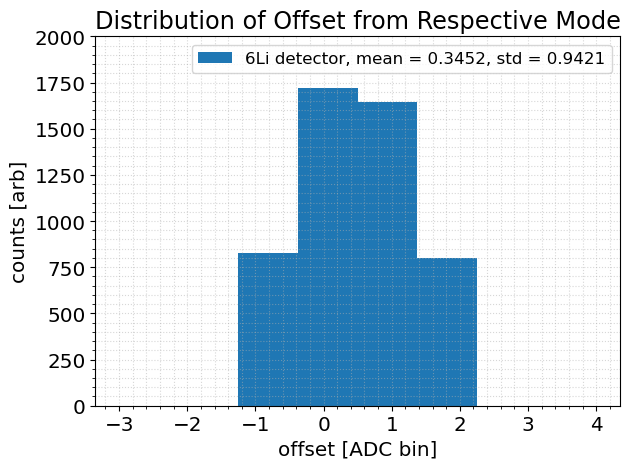

24.3453848361969 sec


In [19]:
## NEW FOR THESIS 06.24.25

%matplotlib inline
print(offset.shape)

ran = [-100,5000]
b = 30
    
chli = -1
ch = 2

mean = np.round(np.average(offset[ch]),4)
std = np.round(np.std(offset[ch]),4)
meanli = np.round(np.average(offset[chli]),4)
stdli = np.round(np.std(offset[chli]),4)

plt.figure()
plt.hist(offset[ch], bins =b, range = ran,  label = rf'NaI Ch. {chan_enab[ch]}, mean = {mean}, std = {std}')  ## all runs, ch, parameters array, sigma value
# plt.figure()
plt.hist(offset[chli], bins =b, range = ran, alpha =0.9, hatch='--',histtype='step', label = '6Li'+rf', mean = {meanli}, std = {stdli}')  ## all runs, ch, parameters array, sigma value

plt.title(rf'Distribution of Offset from Respective Mode', fontsize = 'xx-large')
plt.legend(fontsize = 'medium')
plt.ylim(0,10)
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.ylabel('counts [arb]',fontsize = 'x-large')
plt.xlabel('offset [ADC bin]',fontsize = 'x-large')
plt.legend(fontsize = 'large')
plt.show()

plt.figure()
ran2 = [-3,4]
b2 = 8
mean = np.round(np.average(offset[chli]),4)
std = np.round(np.std(offset[chli]),4)
plt.hist(offset[ch], bins =b2, range = ran2, label = rf'6Li detector, mean = {mean}, std = {std}')  ## all runs, ch, parameters array, sigma value
# plt.figure()
# plt.hist(offset[:,ch+1,0,p], bins =b, range = ran, alpha =0.9, hatch='--',histtype='step', label = chleg[ch+1]+rf', mean = {mean2}, std = {std2}')  ## all runs, ch, parameters array, sigma value
# plt.legend(fontsize = 'medium')

plt.title(rf'Distribution of Offset from Respective Mode', fontsize = 'xx-large')
# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.ylabel('counts [arb]',fontsize = 'x-large')
plt.xlabel('offset [ADC bin]',fontsize = 'x-large')
plt.ylim(0,2000)
plt.legend(fontsize = 'large')
plt.tight_layout()
plt.show()

# print(ys_bgsub)

end = time.time()
print(end-start, 'sec')

In [125]:
s = 17
e = s+200
ch = 2
print(offset[ch][s:e])
# print(offset[-1][s:e])
print(offset[-1][s:e]-offset[ch][s:e])
print(np.where(np.abs(offset[-1][s:e]-offset[ch][s:e]) >=2 ))
print(offset[ch][np.where(np.abs(offset[-1][s:e]-offset[ch][s:e]) >=2 )])

[ 2 -1 -1  2  1  1 -1  2  0  1  2  1  1  1  0  1 -1  0  0  1  0  0  2  1
 -1  1  1  1 -1  0  0  0  0  0  0 -1  2  0  0  1 -1  1  2  1  1 -1  0  0
  0  1  1  2 -1  0  0  0  0  1  1  1  1  1  0  0 -1 -1  2  0  0 -1  1  0
  0  0 -1 -1  2  2  1  1  1  1  1  1  1  2  1  1  2  0  0  0  0  1  1  2
  2 -1 -1  2 -1 -1  0  0  0  0  1  0  0  0 -1  2  1  1  0  1  0 -1  1 -1
  2  1  0 -1  1  0  0  2  1 -1  1  0  2  1  0  1  0 -1  1  0  2  1 -1  0
  2  0  2  0  0  1 -1  1  1 -1  0  1  1 -1  0  1 -1 -1  1  2  0  2  0  1
 -1  0 -1  0 -1  1  0  1  0  2  1  0  2  1 -1  1 -1  1  0  2  0  2  1  0
  1  0 -1  0 -1  1 -1  0]
[ 0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1 -1  0  0  0  0  0 -1
  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 

In [141]:
## pulse 150 shows max offset, pulse 2048 shows example false trigger
## plotting examples for thesis
%matplotlib qt

pulse = 2048
NaI1 = 0
NaI2 = 7

plt.figure()
plt.title(rf'Example t0 misalignment Pulses (Pr sample)', fontsize = 'xx-large')
plt.plot(xs[NaI1],ys_basesub[NaI1][pulse], label='NaI detector ' + str(chan_enab[NaI1]))
# plt.plot(xs[NaI2],ys_basesub[NaI2][pulse], label='NaI detector ' + str(chan_enab[NaI2]))
plt.plot(xs[-1],ys_basesub[-1][pulse], label='6Li (inverted signal)')

plt.axhline(NaIthresh, ls = '--', c ='#1f77b4', label='NaI t0 threshold')
plt.axhline(Li6thresh, ls = '--', c ='#ff7f0e', label='6Li t0 threshold')

plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.ylabel('ADC [arb.]',fontsize = 'x-large')
plt.xlabel('Time from trigger [ns]',fontsize = 'x-large')
# plt.ylim(0,2000)
plt.legend(fontsize = 'large')
plt.tight_layout()
plt.show()


NaI1 = 2
p1 = 17
p2 = 18
w = 2.5
plt.figure()
plt.title(rf't0 Alignment (Pr sample)', fontsize = 'xx-large')
# plt.plot(xs[NaI1],ys_basesub[NaI1][pulse], label='NaI detector ' + str(chan_enab[NaI1]) + ', before alignment')
# plt.plot(xs[-1],ys_basesub[-1][pulse], label='6Li' + ', before alignment') 
# plt.plot(xs_cut[NaI1],ys_cut[NaI1][pulse], label='NaI detector ' + str(chan_enab[NaI1]) + ', after alignment')
# plt.plot(xs_cut[-1],ys_cut[-1][pulse], label='6Li' + ', after alignment') 
# plt.plot(xs[NaI2],ys_basesub[NaI2][pulse], label='NaI detector ' + str(chan_enab[NaI2]) + ', before alignment')
# plt.plot(xs_cut[NaI2],ys_cut[NaI2][pulse], label='NaI detector ' + str(chan_enab[NaI2]) + ', after alignment')
plt.plot(ys_basesub[NaI1][p1], label=f'NaI {chan_enab[NaI1]} pulse {p1}, before alignment', lw = w)
# plt.plot(ys_basesub[-1][pulse], label='6Li' + ', before alignment') 
plt.plot(ys_basesub[NaI1][p2], label=f'NaI {chan_enab[NaI1]} pulse {p2}, before alignment', lw = w)
# plt.plot(ys_basesub[-1][pulse], label='6Li' + ', before alignment') 
plt.plot(ys_cut[NaI1][p1], label=f'NaI {chan_enab[NaI1]} pulse {p1}, after alignment', ls = '--', lw = w)
plt.plot(ys_cut[NaI1][p2], label=f'NaI {chan_enab[NaI1]} pulse {p2}, after alignment', ls = '--', lw = w)
# plt.plot(ys_cut[-1][pulse], label='6Li' + ', after alignment') 
# plt.plot(ys_basesub[NaI2][p1], label='NaI detector ' + str(chan_enab[NaI2]) + ', before alignment')
# plt.plot(ys_cut[NaI2][p2], label='NaI detector ' + str(chan_enab[NaI2]) + ', after alignment')

# plt.axhline(NaIthresh, ls = '--', c ='#1f77b4', label='NaI t0 threshold')
# plt.axhline(Li6thresh, ls = '--', c ='#ff7f0e', label='6Li t0 threshold')

plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.ylabel('ADC [arb.]',fontsize = 'x-large')
plt.xlabel('Bins [arb]',fontsize = 'x-large')
plt.xlim(1990,2005)
plt.ylim(-1,3700)
plt.legend(fontsize = 'large')
plt.tight_layout()
plt.show()


In [142]:
print(ys_cut.shape)

(12, 5000, 8992)


## previous testing ##

In [12]:
## trying pad without pad 

ys_ext_test = np.zeros((len(ys_basesub), len(ys_basesub[0]), len(ys_basesub[0][0])+3*2), dtype=np.float64)
ys_ext_test[0][0] = np.pad(ys_basesub[0][0], 3, 'constant', constant_values=(0))
print(ys_ext_test[0][0][0:5], ys_ext_test[0][0][-5:])
print(ys_basesub[0][0][0:5], ys_basesub[0][0][-5:])

def pad2(mat, padding, pad_with=0):
    n_rows = len(mat)
    # new empty matrix of the required size
    new_mat = [pad_with for row in range(n_rows + padding * 2)]
    
    #"insert" original matix in the empty matrix
    for row in range(n_rows):
        new_mat[row + padding] = mat[row]

    return new_mat

# test = [-1,-2,1,2,3,4,5]
# newtest = pad2(test, 3)
# print(test)
# print(newtest)

ys_ext_test2 = np.zeros((len(ys_basesub), len(ys_basesub[0]), len(ys_basesub[0][0])+3*2), dtype=np.float64)
# ys_ext_test2[0][0] = np.pad(ys_basesub[0][0], 3, 'constant', constant_values=(0))
ys_ext_test2[0][0] = pad2(ys_basesub[0][0], 3)
print(ys_ext_test2[0][0][0:5], ys_ext_test2[0][0][-5:])
print(ys_basesub[0][0][0:5], ys_basesub[0][0][-5:])

## Looks like it works!! 

[ 0.          0.          0.         -3.52357143 -1.52357143] [-0.52357143  0.47642857  0.          0.          0.        ]
[-3.52357143 -1.52357143 -2.52357143 -3.52357143 -2.52357143] [ 7.47642857  2.47642857  0.47642857 -0.52357143  0.47642857]
[ 0.          0.          0.         -3.52357143 -1.52357143] [-0.52357143  0.47642857  0.          0.          0.        ]
[-3.52357143 -1.52357143 -2.52357143 -3.52357143 -2.52357143] [ 7.47642857  2.47642857  0.47642857 -0.52357143  0.47642857]


In [14]:
## same as other align_cut but replacing np.pad with pad2, then using jit. Seems slower! Kept in case its needed

start = time.time()

extendedRange = 3 ## must be a positive value which to extend ys_arr
if abs(max(offset[-1], key = abs)) > extendedRange: ## if the max offset of 6Li is >extendedRange, something is wrong
    raise Exception('ERROR: largest offset greater than extended range')

@njit
def pad2(mat, padding, pad_with=0):
    n_rows = len(mat)
    # new empty matrix of the required size
    new_mat = [pad_with for row in range(n_rows + padding * 2)]
    
    #"insert" original matix in the empty matrix
    for row in range(n_rows):
        new_mat[row + padding] = mat[row]

    return new_mat

# cant use jit because np.pad is not supported
@njit
def align_cut2(ys, extendedr):
    ys_ext = np.zeros((len(ys), len(ys[0]), len(ys[0][0])+extendedr*2), dtype=np.float64)
    ys_cut = np.zeros((len(ys), len(ys[0]), (len(ys_ext[0][0])-((extendedr*2)+1)*2)))
    for i in range(len(ys)):
        for p in range(len(ys[i])):
            #print(len(ys_basesub[i][p]))
            ys_ext[i][p] = pad2(ys[i][p], extendedr)
            ys_ext[i][p] = np.roll(ys_ext[i][p],offset[-1][p]) ## assumes 6Li at -1 position
            #ys_cut[i][p] = ys_ext[i][p][((extendedRange*2)+1):-((extendedRange*2)+1)].copy() ## cut by 7 (if extRange == 3)
            ys_cut[i][p] = ys_ext[i][p][((extendedr*2)+1):-((extendedr*2)+1)].copy() ## cut by 7 (if extRange == 3)
            #print(ys_ext[i][p][0])
            #print(ys_basesub[p][0:10])
                
    return ys_cut

ys_cut2 = align_cut2(ys_basesub, extendedRange)

checkp = 2045
print(offset[-1][checkp]) ## checking offset for one example checkpulse
print('original index for checkpulse: '+str(np.argmax(ys_basesub[0][checkp]> 2000))) ## we can follow the index as it changes with extension/cut
#print('extended range index for checkpulse: '+str(np.argmax(ys_ext[0][checkp]> 2000)))
print('cut array index for checkpulse: '+str(np.argmax(ys_cut[0][checkp]> 2000)))

print(len(offset))
print(len(offset[0]))
print(offset[-1][100:150])

print(len(ys_basesub[0][0]))
#print(len(ys_ext[0][0]))
print(len(ys_cut[0][0]))

## del ys_ext ### get rid of this variable??

end = time.time()
print('aligning and cutting time: ' + str(end-start))            

KeyboardInterrupt: 

In [10]:
import timeit

In [11]:
# trying pad function again!! 08.15.24

## same as other align_cut but replacing np.pad with pad2, then using jit. Seems slower! Kept in case its needed

ys_ext = np.zeros((len(ys_basesub), len(ys_basesub[0]), len(ys_basesub[0][0])+extendedRange*2), dtype=np.float64)
ys_cut = np.zeros((len(ys_basesub), len(ys_basesub[0]), (len(ys_ext[0][0])-((extendedRange*2)+1)*2)))
xs_cut = np.zeros((len(ys_cut), len(ys_cut[0][0])))

start = time.time()

extendedRange = 3 ## must be a positive value which to extend ys_arr
if abs(max(offset[-1], key = abs)) > extendedRange: ## if the max offset of 6Li is >extendedRange, something is wrong
    raise Exception('ERROR: largest offset greater than extended range')

@njit
def pad2(mat, padding, pad_with=0):
    n_rows = len(mat)
    # new empty matrix of the required size
    new_mat = [pad_with for row in range(n_rows + padding * 2)]
    
    #"insert" original matix in the empty matrix
    for row in range(n_rows):
        new_mat[row + padding] = mat[row]

    return new_mat

# cant use jit because np.pad is not supported
# @njit
# def align_cut2(ys, extendedr):
#     ys_ext = np.zeros((len(ys), len(ys[0]), len(ys[0][0])+extendedr*2), dtype=np.float64)
#     ys_cut = np.zeros((len(ys), len(ys[0]), (len(ys_ext[0][0])-((extendedr*2)+1)*2)))
#     for i in range(len(ys)):
#         for p in range(len(ys[i])):
#             #print(len(ys_basesub[i][p]))
#             ys_ext[i][p] = pad2(ys[i][p], extendedr)
#             ys_ext[i][p] = np.roll(ys_ext[i][p],offset[-1][p]) ## assumes 6Li at -1 position
#             #ys_cut[i][p] = ys_ext[i][p][((extendedRange*2)+1):-((extendedRange*2)+1)].copy() ## cut by 7 (if extRange == 3)
#             ys_cut[i][p] = ys_ext[i][p][((extendedr*2)+1):-((extendedr*2)+1)].copy() ## cut by 7 (if extRange == 3)
#             #print(ys_ext[i][p][0])
#             #print(ys_basesub[p][0:10])
                
#     return ys_cut

@njit
def align_cut3(ys, xs_arr, extendedr):
    tempys_ext = np.zeros((len(ys), len(ys[0])+extendedr*2), dtype=np.float64)
    tempys_cut = np.zeros((len(ys), (len(tempys_ext[0])-((extendedr*2)+1)*2)))
    tempxs_cut = np.zeros(len(tempys_cut[0]))
    for p in range(len(ys)):
        tempys_ext[p] = pad2(ys[p], extendedr)
        tempys_ext[p] = np.roll(tempys_ext[p],offset[-1][p]) ## assumes 6Li at -1 position
        tempys_cut[p] = tempys_ext[p][((extendedr*2)+1):-((extendedr*2)+1)].copy() ## cut by 7 (if extRange == 3)
#         tempys_cut[p] = tempys_cut[p]/HeNorms[p] ## normalize by 3He integral  ## comment out if using basesub_norm
    x_cut_amt = int((len(ys[0]) - len(tempys_cut[0]))/2)
    tempxs_cut = xs_arr[x_cut_amt:-x_cut_amt].copy()
    return tempys_cut, tempxs_cut

# for i in range(len(ys_basesub)):
#     ys_cut[i], xs_cut[i] = align_cut3(ys_basesub[i], xs[i], extendedRange)

checkp = 2045
print(offset[-1][checkp]) ## checking offset for one example checkpulse
print('original index for checkpulse: '+str(np.argmax(ys_basesub[0][checkp]> 2000))) ## we can follow the index as it changes with extension/cut
#print('extended range index for checkpulse: '+str(np.argmax(ys_ext[0][checkp]> 2000)))
print('cut array index for checkpulse: '+str(np.argmax(ys_cut[0][checkp]> 2000)))

## del ys_ext ### get rid of this variable??

end = time.time()
print('aligning and cutting time: ' + str(end-start)) 


-1
original index for checkpulse: 1999
cut array index for checkpulse: 0
aligning and cutting time: 0.0029985904693603516


In [12]:
ys_ext = np.zeros((len(ys_basesub), len(ys_basesub[0]), len(ys_basesub[0][0])+extendedRange*2), dtype=np.float64)
ys_cut = np.zeros((len(ys_basesub), len(ys_basesub[0]), (len(ys_ext[0][0])-((extendedRange*2)+1)*2)))
xs_cut = np.zeros((len(ys_cut), len(ys_cut[0][0])))

start = time.time()

extendedRange = 3 ## must be a positive value which to extend ys_arr
if abs(max(offset[-1], key = abs)) > extendedRange: ## if the max offset of 6Li is >extendedRange, something is wrong
    raise Exception('ERROR: largest offset greater than extended range')

def align_cut(ys, xs_arr, extendedr):
    tempys_ext = np.zeros((len(ys), len(ys[0])+extendedr*2), dtype=np.float64)
    tempys_cut = np.zeros((len(ys), (len(tempys_ext[0])-((extendedr*2)+1)*2)))
    tempxs_cut = np.zeros(len(tempys_cut[0]))
    for p in range(len(ys)):
        tempys_ext[p] = np.pad(ys[p], extendedr, 'constant', constant_values=(0))
        tempys_ext[p] = np.roll(tempys_ext[p],offset[-1][p]) ## assumes 6Li at -1 position
        tempys_cut[p] = tempys_ext[p][((extendedr*2)+1):-((extendedr*2)+1)].copy() ## cut by 7 (if extRange == 3)
#         tempys_cut[p] = tempys_cut[p]/HeNorms[p] ## normalize by 3He integral  ## comment out if using basesub_norm
    x_cut_amt = int((len(ys[0]) - len(tempys_cut[0]))/2)
    tempxs_cut = xs_arr[x_cut_amt:-x_cut_amt].copy()
    return tempys_cut, tempxs_cut

# Below commented out for testing without t0 aligning 08.08.24 ##
# for i in range(len(ys_basesub)):
#     ys_cut[i], xs_cut[i] = align_cut(ys_basesub[i], xs[i], extendedRange)
        
checkp = 2045
print(offset[-1][checkp]) ## checking offset for one example checkpulse
print('original index for checkpulse: '+str(np.argmax(ys_basesub[0][checkp]> 2000))) ## we can follow the index as it changes with extension/cut
#print('extended range index for checkpulse: '+str(np.argmax(ys_ext[0][checkp]> 2000)))
print('cut array index for checkpulse: '+str(np.argmax(ys_cut[0][checkp]> 2000)))

## del ys_ext ### get rid of this variable??

end = time.time()
print('aligning and cutting time: ' + str(end-start))            

-1
original index for checkpulse: 1999
cut array index for checkpulse: 0
aligning and cutting time: 0.001998424530029297


### looks like np.pad is faster! below:

In [15]:
## pad function
%timeit -n 50 for i in range(len(ys_basesub)): ys_cut[i], xs_cut[i] = align_cut3(ys_basesub[i], xs[i], extendedRange)

6.21 s ± 319 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [14]:
## np pad
%timeit -n 50 for i in range(len(ys_basesub)): ys_cut[i], xs_cut[i] = align_cut(ys_basesub[i], xs[i], extendedRange)

5.07 s ± 128 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [97]:
## Old. I tried to make new xs for every channel, every pulse. Maybe doable, but way too long

start = time.time()

print(len(offset))
print(len(offset[0]))
print(offset[0][0]*512)
print(xs[0] - offset[0][0]*512)
print(len(xs))
print((xs[0]))
print(len(xs[0]))
print((xs[0][8999]))
print((xs[0][8998]))
print((xs[0][0] - xs[0][1]))
print((xs[0][500] - xs[0][501]))

print(resolution)
newxs = np.zeros((len(ys_basesub), numRuns, 9000), dtype=np.float64) ## can change hardcoding of #samples of 9000 (for Nai/6Li)
print(len(newxs))
print(len(newxs[0]))
print(len(newxs[0][0]))

# @jit(nopython = True)
# for i in range(len(newxs)):
#     for p in range(len(newxs[i])):
#         for j in range(len(newxs[i][p])):
#             newxs[i][p] = xs[i] - offset[i][p]*512 ## 512 resolution

# end = time.time()
# print(end-start)  
        
# print(newxs[0][0])
# print(xs[0])



SyntaxError: invalid syntax (3987786874.py, line 22)

In [107]:
NaIthresh=2000
Li6thresh=1000
print(len(ys_basesub))

threshold_array = (np.full(len(ys_basesub), NaIthresh))
threshold_array[-1] = Li6thresh

#xCrosses=[]#outer array is crossing arrays for given channel, inner array is crossing for each event
xCrosses = np.zeros((len(ys_basesub), numRuns))
modeCrosses=[] #single array with one value per channel
xValues=[]
xtimems=[]
extendedRange=3

for i in range(0,len(ys_basesub)):
#     xCrosses.append([])
    xValues.append([])
    for j in ys_basesub[i]:
        thresh_xing = np.diff(j > threshold_array[i], prepend=False)
        #print(len(thresh_xing))
        xing = np.argwhere(thresh_xing)[:,0]
        #print(xing[0])
        #print(len(xing))
    for p in range(len(ys_basesub[i])):
        #print(xing[0])
        xCrosses[i][p] = xing[0]
        #print(len(xCrosses[i]))
    modeCrosses.append(st.mode(xCrosses[i])) #find the most typical crossing value for each channel
    xValues[i].append(np.arange(len(ys_arr[i][0])+2*extendedRange)-modeCrosses[i])
    xtimems.append(xValues[i][-1]*resolution[i]*10**(-6))

print(len(xtimems[1]))
print(modeCrosses)
print(xValues[0])
print(len(xValues))
print(len(xCrosses))
print(len(xCrosses[0]))
print((xCrosses[0][10:30]))

12
9006
[1997.0, 1997.0, 1997.0, 1997.0, 1997.0, 1997.0, 1997.0, 1997.0, 1997.0, 1997.0, 1997.0, 1997.0]
[array([-1997., -1996., -1995., ...,  7006.,  7007.,  7008.])]
12
12
5000
[1997. 1997. 1997. 1997. 1997. 1997. 1997. 1997. 1997. 1997. 1997. 1997.
 1997. 1997. 1997. 1997. 1997. 1997. 1997. 1997.]


## Previous cells

In [9]:
### TESTING CELL ###
print(chan_enab)
print(len(chan_enab))
print(numSamples)
numRuns = int((fileLength[0]-20-numSamples[0])/(numSamples[0]+6)+1)
print(numRuns)
testys = np.zeros((len(chan_enab), numRuns,numSamples[0]), dtype=np.uint16)
print(len(testys[0][0]))
print(len(read_data))
print(len(read_data[0]))
print((read_data[0][45]))

numSamples[0]=((read_data[0][11]&0x00FF)<<16)+read_data[0][10]
print(numSamples[0])
print(testys[0][0][8999])
testys[0][0][8999] = read_data[0][8999]
print(testys[0][0][8999])
# print('He:')
# numSamplesHe = numSamples[-1]
# print(numRunsHe)
# ys_arrHe = np.zeros((1,numRuns,numSamples[-1]), dtype=np.uint16)
# print(len(ys_arrHe[0][0]))

# for i in range(0,len(chan_enab)):
#     print(numSamples[i])
#     if chan_enab[i] == 25:
#             print('3He channel loaded')

[ 0  1  2  3  4  5 19 20 21 22 23 24]
12
[9000 9000 9000 9000 9000 9000 9000 9000 9000 9000 9000 9000]
5000
9000
12
45030014
592
9000
0
595


In [18]:
import numba
from numba.typed import List
from numba import uint16, intc, uint32
from array import array
start=time.time()

#ys_arr = []
#ETTT_arr = []
#eventcount_arr = []
#ys_arr = List.empty_list(uint16)
#ETTT_arr = List.empty_list(intc)
#eventcount_arr = List.empty_list(intc)
#print(type(ETTT_arr[0]))

#ys_arr = List([np.empty(0) for _ in range(len(chan_enab))])
#ETTT_arr = List([np.empty(0) for _ in range(len(chan_enab))])
#eventcount_arr = List([np.empty(0) for _ in range(len(chan_enab))])
#def __init__(self):
#    self.ys_arr = typed.List.empty_list(types.float64)
#    return ys_arr
#print(eventcount_arr)

#@jit("uint16[:,:](uint16[:,:], uint32, uint32, uint32)")
@njit
def test2(read_data, channels, fileLength, numSamples):
    #ys_arr = []
    numRuns = int((fileLength[0]-20-numSamples[0])/(numSamples[0]+6)+1)
    ys_arr = np.zeros((len(channels), numRuns,numSamples[0]), dtype=np.uint16)
    ETTT_arr = np.zeros((len(channels), numRuns), dtype=np.intc)
    eventcount_arr = np.zeros((len(channels), numRuns), dtype=np.intc)
#     if channels[-1] != 25:
#         print('No 3He. Cannot normalize')
#         ys_arr = [0]
#         ETTT_arr = [0]
#         eventcount_arr = [0]
#         return ys_arr, ETTT_arr, eventcount_arr
#     elif channels[-1] == 25:
#         ys_arrHe = np.zeros((numRuns,numSamples[-1]), dtype=np.int64)
#     #ETTT_arr = []
#     #eventcount_arr = []
#     #print(ys_arr)
    for i in range(0,len(channels)):
        eventCount = 0
        byteCounter = 0
        #ys_arr.append([])
        #eventcount_arr.append([])
        #ys_arr.append(List.empty_list(uint16))
        #eventcount_arr.append(List.empty_list(intc))
        #print(ys_arr)
#         if channels[i] == 25:
#             print('3He channel loaded')
#             while byteCounter < fileLength[i]:
#                 if byteCounter == 0:
#                     #ETTT_arr[i]=TTT[i]
#                     ##ETTT_arr[i].append(TTT[i])
#                     #eventcount_arr[i]=(eventCounter[i])
#                     byteCounter = 20
#                 else:
#                     #ETTT_arr[i]=(read_data[i][byteCounter]+(read_data[i][byteCounter+1]<<16)+(read_data[i][byteCounter+2]<<32))
#                     #eventcount_arr[i]=(read_data[i][byteCounter+4]+(read_data[i][byteCounter+5]<<16))
#                     byteCounter += 6
#                 for j in range(0, numSamples[i]):
#                     #if j == 0:
#                         #ys_arr[i].append([])
#                     #print(byteCounter)
#                     ys_arrHe[eventCount][j]=read_data[i][byteCounter]
#                     byteCounter += 1
#                 eventCount += 1
        #else:
            #byte counter is really 2bytecounter, lol
        while byteCounter < fileLength[i]:
            if byteCounter == 0:
                ETTT_arr[i]=TTT[i]
                #ETTT_arr[i].append(TTT[i])
                eventcount_arr[i]=(eventCounter[i])
                byteCounter = 20
            else:
                ETTT_arr[i]=(read_data[i][byteCounter]+(read_data[i][byteCounter+1]<<16)+(read_data[i][byteCounter+2]<<32))
                eventcount_arr[i]=(read_data[i][byteCounter+4]+(read_data[i][byteCounter+5]<<16))
                byteCounter += 6
            for j in range(0, numSamples[i]):
                #if j == 0:
                    #ys_arr[i].append([])
                #print(byteCounter)
                ys_arr[i][eventCount][j]=read_data[i][byteCounter]
                byteCounter += 1
            eventCount += 1
    return ys_arr, ETTT_arr, eventcount_arr

#start=time.time()
#ys_arrHe = List.empty_list(uint16)
ys_arr, ETTT_arr, eventcount_arr  = test2(read_data, chan_enab, fileLength, numSamples)
end = time.time()
print(end-start)
print(len(ys_arr))
print(len(ETTT_arr))
# print('He:')
# print(len(ys_arrHe))
# print(len(ys_arrHe[0]))
#print(len(ys_arr[0]))
#print(len(ys_arr[0][0]))


C:\Users\gabeo\anaconda3\lib\site-packages\numba\core\ir_utils.py:2152: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'fileLength' of function 'test2'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "C:\Users\gabeo\AppData\Local\Temp\ipykernel_83904\1408888969.py", line 25:
@jit(nopython = True)
def test2(read_data, channels, fileLength, numSamples):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
C:\Users\gabeo\anaconda3\lib\site-packages\numba\core\ir_utils.py:2152: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'read_data' of function 'test2'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types


3.4172468185424805
12
12


Put ADC values in arrays for each channel (one array per event, an array of events per channel) and put the miniheader information in an array

start=time.time()
ys_arr = np.array([])
ETTT_arr = []
eventcount_arr = np.array([])

for i in range(0,len(chan_enab)):
    eventCount = 0
    byteCounter = 0
    np.append(ys_arr,np.array([]))
    np.append(eventcount_arr,np.array([]))
    
    #byte counter is really 2bytecounter, lol
    while byteCounter < fileLength[i]:
        if byteCounter == 0:
            #np.append(ETTT_arr,np.array([]))
            ETTT_arr[i].append([])
            np.append(eventcount_arr,np.array([]))
            #np.append(ETTT_arr[i],TTT[i])
            ETTT_arr[i].append(TTT[i])
            np.append(ETTT_arr,np.array([]))
            eventcount_arr[i].append(eventCounter[i])
            byteCounter = 20
        else:
            ETTT_arr[i].append(read_data[i][byteCounter]+(read_data[i][byteCounter+1]<<16)+(read_data[i][byteCounter+2]<<32))
            eventcount_arr[i].append(read_data[i][byteCounter+4]+(read_data[i][byteCounter+5]<<16))
            byteCounter += 6
        for j in range(0, numSamples[i]):
            if j == 0:
                ys_arr[i].append(np.array([]))
            ys_arr[i][eventCount].append(read_data[i][byteCounter]) 
            byteCounter += 1
        eventCount += 1
#read_data.clear()
    #times_arr.append(list(map(list, zip(*headers_arr[i][1:])))[0])
    
end = time.time()
print(end-start)

Calculate the time difference between each event within a file - used to check for dropping pulses. It seems that if we make the record window 49.152 ms long, we miss every other pulse (at 20 Hz). This is not that surprising - we presumably will not need a lot of data (or any) with the full 50 ms time window.

Plot each channels' events

In [6]:
#switchs = [31, 74, 117, 160, 203, 246, 289, 332]
#%matplotlib notebook
baseL = 0
baseR = int(((preTime[0]-groupStart[0])*0.70)/chanDec[0])
intgrL = 0 # bin 1800 looks OK for integral, but start at 0...
intgrR = 8999
HeintgrL = 7000 # 3He data is a different size
HeintgrR = 16000
sums = []
ys_basesub = [] 
legend = ['NaI', '6Li', '3He']
#statesID = ['111', '101', '100', '110','101','110','111','100','111']
#switchpulses = np.arange(230,575,43)
#print(switchpulses)
#p=8
pulse = 20
#print(pulse)

#%matplotlib qt
#for i in range(0,len(chan_enab)):
for i in range(0,3):
    tempys_basesub = []
    tempsums =[]
    s=pulse
    t=s+1
    for j in range(0, len(ys_arr[i])): ##baseline subtract all pulses and take integral of all pulses
        if i==2: ## currently 3He is i=2. change if changing # of channels
            tempys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][baseL:baseR]))
            tempsums.append(sum(tempys_basesub[j][HeintgrL:HeintgrR]))  ## Need to change sums array format if also doing LO/R
        else:
            tempys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][baseL:baseR]))
            #print(np.mean(ys_arr[i][j][200:6000]))
            tempsums.append(sum(tempys_basesub[j][intgrL:intgrR]))  ## Need to change sums array format if also doing LO/R
    ys_basesub.append(tempys_basesub)
    sums.append(tempsums)
    #print(len(ys_basesub))
    for j in range(s, t): ## plot only interested pulses
        #ys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][200:6000]))
        #print(sum(ys_basesub[i][j])) 
        plt.plot(xs[i], tempys_basesub[j] , label=legend[i] +', Integral = ') #+str(sums[1][j])) ## sums[j] will not work for more than just TR   

#plt.xlim(-50000, 900000)
#plt.ylim(3000,4100)
plt.title('Detector signals') 
plt.xlabel("time from trigger (ns)")
plt.ylabel("ADC")
print(len(xs[0]))
print(len(ys_arr[0][0]))
plt.axvline(xs[0][baseL], ls = '--')
plt.axvline(xs[0][baseR], ls = '--')
plt.axvline(xs[2][HeintgrL], ls = '--', c ='r')
plt.axvline(xs[2][HeintgrR], ls = '--', c ='r')

#plt.text(1.5e7, 1200, 'test', fontsize=12)
plt.legend()
plt.show()

print('sums length:'+ str(len(sums)))
print(len(sums[2]))

#print(np.array(expectedSumsTR)+np.array(expectedSumsR))

print(len(sums))
print(len(ys_arr[2][0]))
print(len(ys_arr[1][0]))
print(len(xs[2]))
#plt.hist(sums, 100)
#plt.show(

9000
9000
sums length:3
5000
3
45000
9000
45000


In [7]:
## Divide NaI and 6Li by 3He integral (normalize), then take integral of NaI and 6Li
baseL = 0
baseR = 1500
intgrL = 0 # bin 1800 looks OK for integral, but start at 0...
intgrR = 8999
HeintgrL = 7000 # 3He data is a different size
HeintgrR = 16000
#res =2.3 ms
sums = []
sums_norm = []
ys_basesub = []
ys_base_norm = [] 
legend = ['NaI', '6Li', '3He']
#statesID = ['111', '101', '100', '110','101','110','111','100','111']
#switchpulses = np.arange(230,575,43)
#print(switchpulses)
#p=8
pulse = 20
#print(pulse)
## t_to_eV = 0.5*(1.6749286*10**(-27))*((27.3/TIME))**2*(6.24151*10**18 [J/eV])

#%matplotlib qt
#for i in range(0,len(chan_enab)):
for i in (range(0,3)):
    tempys_basesub = []
    tempsums =[]
    s=pulse
    t=s+1
    for j in range(0, len(ys_arr[i])): ##baseline subtract all pulses and take integral of all pulses
        if i==2: ## currently 3He is i=2. change if changing # of channels
            tempys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][baseL:baseR]))
            tempsums.append(sum(tempys_basesub[j][HeintgrL:HeintgrR]))  ## Need to change sums array format if also doing LO/R
        else:
            tempys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][baseL:baseR]))
            #print(np.mean(ys_arr[i][j][200:6000]))
            tempsums.append(sum(tempys_basesub[j][intgrL:intgrR]))  ## Need to change sums array format if also doing LO/R
    ys_basesub.append(tempys_basesub)
    sums.append(tempsums)
    #print(len(ys_basesub))
    for j in range(s, t): ## plot only interested pulses
        #ys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][200:6000]))
        #print(sum(ys_basesub[i][j])) 
        plt.plot(xs[i], tempys_basesub[j] , label=legend[i] +', Integral = ') #+str(sums[1][j])) ## sums[j] will not work for more than just TR   
 
        
## now normalize NaI and 6Li (can we do this in the forloop above?)

print(sums[2][pulse])
print((ys_basesub[1][pulse]))
print((ys_basesub[1][pulse]/sums[2][pulse]))

for i in (range(0,2)):
    tempys_base_norm = []
    tempsums =[]
    s=pulse
    t=s+1
    for j in range(0, len(ys_arr[i])): ##baseline subtract all pulses and take integral of all pulses
        tempys_base_norm.append(ys_basesub[i][j]/(sums[2][j]/1000000))
        tempsums.append(sum(tempys_base_norm[j][intgrL:intgrR]))  ## Need to change sums array format if also doing LO/R    
    ys_base_norm.append(tempys_base_norm)
    sums_norm.append(tempsums)
    #print(len(ys_basesub))
    for j in range(s, t): ## plot only interested pulses
        #ys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][200:6000]))
        #print(sum(ys_basesub[i][j])) 
        plt.plot(xs[i], tempys_base_norm[j] , label=legend[i] +', normalized') #+str(sums[1][j])) ## sums[j] will not work for more than just TR   
        

#plt.xlim(-50000, 900000)
#plt.ylim(3000,4100)
plt.title('Detector signals') 
plt.xlabel("time from trigger (ns)")
plt.ylabel("ADC")
print(len(xs[0]))
print(len(ys_arr[0][0]))
plt.axvline(xs[0][baseL], ls = '--')
plt.axvline(xs[0][baseR], ls = '--')
plt.axvline(xs[1][intgrL], ls = '--', c ='g')
plt.axvline(xs[1][intgrR], ls = '--', c ='g')
plt.axvline(xs[2][HeintgrL], ls = '--', c ='r')
plt.axvline(xs[2][HeintgrR], ls = '--', c ='r')

#plt.text(1.5e7, 1200, 'test', fontsize=12)
plt.legend()
plt.show()

print('sums length:'+ str(len(sums)))
print(len(sums[2]))

#print(np.array(expectedSumsTR)+np.array(expectedSumsR))

print((sums[1][0]))
print((sums_norm[1][0]))
print((sums[1][0]/(sums[2][0]/1000000))) ##These are basically the same, so we can just use sums/normfactor
#plt.hist(sums, 100)
#plt.show(

6784184.000000795
[-0.066 -0.066 -0.066 ... -1.066 -1.066 -1.066]
[-9.72850972e-09 -9.72850972e-09 -9.72850972e-09 ... -1.57130172e-07
 -1.57130172e-07 -1.57130172e-07]
9000
9000
sums length:3
5000
-63365.88066668381
-9536.136309948082
-9536.136309950876


## Add up all 5000 pulses


In [9]:
baseL = 0
baseR = 1500
intgrL = 0 # bin 1800 looks OK for integral, but start at 0...
intgrR = 8999
HeintgrL = 7000 # 3He data is a different size
HeintgrR = 16000
#res =2.3 ms
sums = []
sums_norm = []
ys_basesub = []
ys_base_norm = [] 
legend = ['NaI', '6Li', '3He']
#statesID = ['111', '101', '100', '110','101','110','111','100','111']
#switchpulses = np.arange(230,575,43)
#print(switchpulses)
#p=8
pulse = 20
#print(pulse)
## t_to_eV = 0.5*(1.6749286*10**(-27))*((27.3/TIME))**2*(6.24151*10**18 [J/eV])

#%matplotlib qt
#for i in range(0,len(chan_enab)):
for i in (range(0,3)):
    tempys_basesub = []
    tempsums =[]
    s=pulse
    t=s+1
    for j in range(0, len(ys_arr[i])): ##baseline subtract all pulses and take integral of all pulses
        if i==2: ## currently 3He is i=2. change if changing # of channels
            tempys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][baseL:baseR]))
            tempsums.append(sum(tempys_basesub[j][HeintgrL:HeintgrR]))  ## Need to change sums array format if also doing LO/R
        else:
            tempys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][baseL:baseR]))
            #print(np.mean(ys_arr[i][j][200:6000]))
            tempsums.append(sum(tempys_basesub[j][intgrL:intgrR]))  ## Need to change sums array format if also doing LO/R
    ys_basesub.append(tempys_basesub)
    sums.append(tempsums)
    #print(len(ys_basesub))
    #for j in range(s, t): ## plot only interested pulses
        #ys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][200:6000]))
        #print(sum(ys_basesub[i][j])) 
        #plt.plot(xs[i], tempys_basesub[j] , label=legend[i] +', Integral = ') #+str(sums[1][j])) ## sums[j] will not work for more than just TR   
 
        
## now normalize NaI and 6Li (can we do this in the forloop above?)
## also add all 5000 pulses together

added_pulses = [] 

for i in (range(0,2)):
    tempys_base_norm = []
    tempsums =[]
    added_pulses.append(np.zeros(len(ys_basesub[i][0]))) ## make zeros array of length equal to window of cahnnel 
    s=pulse
    t=s+1
    for j in range(0, len(ys_arr[i])): ##baseline subtract all pulses and take integral of all pulses
        tempys_base_norm.append(ys_basesub[i][j]/(sums[2][j]/1000000))
        tempsums.append(sum(tempys_base_norm[j][intgrL:intgrR]))## Need to change sums array format if also doing LO/R    
        added_pulses[i] = added_pulses[i]+np.array(tempys_base_norm[j])
    ys_base_norm.append(tempys_base_norm)
    sums_norm.append(tempsums)
    #print(len(ys_basesub))
    #for j in range(s, t): ## plot only interested pulses
        #ys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][200:6000]))
        #print(sum(ys_basesub[i][j])) 
        #plt.plot(xs[i], tempys_base_norm[j] , label=legend[i] +', normalized') #+str(sums[1][j])) ## sums[j] will not work for more than just TR         
    plt.plot(xs[i], added_pulses[i] , label=legend[i] +', 5000 pulses added') 
    
#plt.xlim(-50000, 900000)
#plt.ylim(3000,4100)
plt.title('Detector signals') 
plt.xlabel("time from trigger (ns)")
plt.ylabel("ADC")

plt.axvline(xs[0][baseL], ls = '--')
plt.axvline(xs[0][baseR], ls = '--')
#plt.axvline(xs[1][intgrL], ls = '--', c ='g')
#plt.axvline(xs[1][intgrR], ls = '--', c ='g')
#plt.axvline(xs[2][HeintgrL], ls = '--', c ='r')
#plt.axvline(xs[2][HeintgrR], ls = '--', c ='r')

#plt.text(1.5e7, 1200, 'test', fontsize=12)
plt.legend()
plt.show()

print(len(added_pulses))
print(len(added_pulses[1]))


2
9000


In [10]:
T_0 = np.genfromtxt("/N/u/goterom/Quartz/Desktop/unpol_09919.csv", delimiter=",")
T_0 = T_0[2001:-1]
T_n = added_pulses[1][2001:-1]
print(len(T_0**2/T_n**2))
x_E = 3.895662*10**(-6)*(1/(xs[1][2001:-1]*10**(-9))**2)
print((x_E[380]))
print(xs[1][2400])
print(3.895662*10**(-6)*(1/(512*10**(-9)))**2)
print((512*10**(-9)))


P_E = np.sqrt(np.absolute(1 - (T_0**2/T_n**2)))

plt.plot(x_E[380:-1], P_E[380:-1]) 
    
#plt.xlim(-50000, 900000)
#plt.ylim(3000,4100)
plt.title('3He Polarization P(E)') 
plt.xlabel("E [eV]")
plt.ylabel("P(E)")

#plt.axvline(xs[0][baseL], ls = '--')
#plt.axvline(xs[0][baseR], ls = '--')
#plt.axvline(xs[1][intgrL], ls = '--', c ='g')
#plt.axvline(xs[1][intgrR], ls = '--', c ='g')
#plt.axvline(xs[2][HeintgrL], ls = '--', c ='r')
#plt.axvline(xs[2][HeintgrR], ls = '--', c ='r')

#plt.text(1.5e7, 1200, 'test', fontsize=12)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


6998
102.37440620551811
204800.0
14860771.179199215
5.12e-07


Now get the final sum over all pulses

In [9]:
## sum the sums... Only 6Li is important for this, but keeping it general

legend = ['NaI', '6Li']
sumTot = []
for i in (range(0,2)):
    tempsum = []
    tempsum.append(sum(sums[i]/(np.array(sums[2])/1000000)))
    sumTot.append(tempsum)
    
print(np.mean(sums[2]))
    
print(sumTot)
print('Sum for all spin states of run' + run_num + ': ' + str(sumTot[1][0]))

6652627.0427999925
[[726399252.2521336], [-47553734.12199138]]
Sum for all spin states of run12400: -47553734.12199138


Plot in terms of eV?

In [26]:
## Need to look after 0. Only look at resonance regions.
## t_to_eV = 0.5*(1.6749286*10**(-27))*((27.3/TIME))**2*(6.24151*10**18 [J/eV])
testeV = 0.5*(1.6749286*10**(-27))*(27.3/(np.array(xs[1][2001:])*10**9))**2*(6.24151*10**18)
for i in (range(0,2)):
    tempys_basesub = []
    tempsums =[]
    s=pulse
    t=s+1
    for j in range(0, len(ys_arr[i])): ##baseline subtract all pulses and take integral of all pulses
        if i==2: ## currently 3He is i=2. change if changing # of channels
            tempys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][baseL:baseR]))
            tempsums.append(sum(tempys_basesub[j][HeintgrL:HeintgrR]))  ## Need to change sums array format if also doing LO/R
        else:
            tempys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][baseL:baseR]))
            #print(np.mean(ys_arr[i][j][200:6000]))
            tempsums.append(sum(tempys_basesub[j][intgrL:intgrR]))  ## Need to change sums array format if also doing LO/R
    ys_basesub.append(tempys_basesub)
    sums.append(tempsums)
    #print(len(ys_basesub))
    for j in range(s, t): ## plot only interested pulses
        #ys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][200:6000]))
        #print(sum(ys_basesub[i][j])) 
        plt.plot(testeV, tempys_basesub[j][2001:] , label=legend[i] +', Integral = ') #+str(sums[1][j])) ## sums[j] will not work for more than just TR   

plt.title('Detector signals') 
plt.xlabel("eV")
plt.ylabel("ADC")
print(len(xs[0]))
print(len(ys_arr[0][0]))
#plt.axvline(xs[0][baseL], ls = '--')
#plt.axvline(xs[0][baseR], ls = '--')
#plt.axvline(testeV[intgrL], ls = '--', c ='g')
#plt.axvline(testeV[intgrR], ls = '--', c ='g')
#plt.axvline(xs[2][HeintgrL], ls = '--', c ='r')
#plt.axvline(xs[2][HeintgrR], ls = '--', c ='r')

#plt.text(1.5e7, 1200, 'test', fontsize=12)
plt.legend()
plt.show()
print(xs[1][2001:])
print(testeV)

9000
9000
[5.120000e+02 1.024000e+03 1.536000e+03 ... 3.582464e+06 3.582976e+06
 3.583488e+06]
[1.48607711e-29 3.71519278e-30 1.65119679e-30 ... 3.03541166e-37
 3.03454421e-37 3.03367714e-37]


In [8]:
sumsLO = []
sumsTR = []
sumsR = []

ys_basesub = []
legend = ['LO', 'TR', 'R']
statesID = ['111', '101', '100', '110','101','110','111','100','111']
switchpulses = np.arange(230,575,43)

for j in switchpulses:
    ys_basesub.append(ys_arr[0] - np.mean(ys_arr[0][j][baseL:baseR]))
    sumsLO.append(sum(ys_basesub[0][j][60:-1]))
    #print((len(ys_basesub)))
    ys_basesub = []
for j in switchpulses:
    ys_basesub.append(ys_arr[1] - np.mean(ys_arr[1][j][baseL:baseR]))
    sumsTR.append(sum(ys_basesub[0][j][60:-1]))
    #print((len(ys_basesub)))
    ys_basesub = []
for j in switchpulses:
    ys_basesub.append(ys_arr[2] - np.mean(ys_arr[2][j][baseL:baseR]))
    sumsR.append(sum(ys_basesub[0][j][60:-1]))
    #print((len(ys_basesub)))
    ys_basesub = []
    
sumsLO =np.array(sumsLO)
sumsTR =np.array(sumsTR)
sumsR =np.array(sumsR)
    
print(sumsLO)
print(sumsTR)
print(sumsR)
print(sumsTR+sumsR)

[974515.00199964 936179.22399994 975085.73533334 946074.0853335
 956966.17666671 940943.62866666 963640.02533324 945226.96800023
 993454.70400038]
[-63718.27533335 -62157.608      -63476.67466667 -62421.94266669
 -61866.         -61884.34933335 -63441.75600001 -64378.96666666
 -62743.83733334]
[37273269.79600207 37690246.97534942 37648681.45802363 37170611.38800599
 36896463.00266942 37285983.69603391 37598406.80201846 37789491.5986473
 37631863.84996781]
[37209551.52066872 37628089.36734942 37585204.78335696 37108189.44533931
 36834597.00266942 37224099.34670056 37534965.04601846 37725112.63198064
 37569120.01263448]


In [9]:
##Threshold testing
TRThresh = 32 ## Note the threshold can change from statechange to statechange. Need to figure out a good value.
RThresh = 30
ys_basesub = []
where = []
pulseswitch_list = []
zeros=0
zeros_arr = []
switchbin = []
States_full = [zeros_arr,switchbin]

#for i in range(0,len(chan_enab)):
for i in range(1,2):
    s=pulse
    t=s+1
    for j in range(0, len(ys_arr[i])):
    #for j in range(s, t):
        ys_basesub.append(ys_arr[i][j] - np.mean(ys_arr[i][j][200:6000]))
        thresh_xing = np.diff(np.absolute(ys_basesub[j]) > TRThresh, prepend=False)
        xing = np.argwhere(thresh_xing)[:,0]
        #print(len(xing))
        if len(xing)== 0:
            #pulseswitch_list.append(0)  ## can now get rid of this, but illustrrates non-switch and switch pulses
            zeros+=1
        else:
            #pulseswitch_list.append(xing[0])  ## can now get rid of this, but illustrrates non-switch and switch pulses
            switchbin.append(j)
            zeros_arr.append(zeros)
            zeros=0
        
#for pulse in pulseswitch_list:
#    #print(pulse)
#    if pulse==0:
#        #print(zeros[0])
#        zeros+=1
#    else:
#        switchbin.append(pulse)
#        zeros_arr.append(zeros)
#        zeros=0
        
States_full = np.array(States_full).T
            
for state in States_full[1:]:
    if state[0]!=42:
        print('SF ERROR!')
    else:
        print('SF OK')
        #where.append(np.where(ys_basesub[j] > TRThresh))
        #print(np.mean(ys_arr[i][j][200:6000]))
        #print(sum(ys_basesub[i][j]))
        #sums.append(sum(ys_basesub[i][j][9000:-1]))
        #plt.plot(xs[i], ys_basesub[i][j], label=legend[i]+', Integral = '+str(sums[i]))

#print(pulseswitch_list)
print(States_full)
#print(zeros)

SF OK
SF OK
SF OK
SF OK
SF OK
SF ERROR!
SF OK
SF OK
SF OK
SF OK
SF OK
SF OK
SF ERROR!
SF OK
SF OK
SF OK
SF OK
SF OK
SF OK
SF ERROR!
SF OK
SF OK
SF OK
SF OK
SF OK
SF OK
SF ERROR!
SF OK
SF OK
SF OK
SF OK
SF OK
SF OK
SF ERROR!
SF OK
SF OK
SF OK
SF OK
SF OK
SF OK
SF ERROR!
SF OK
SF OK
SF OK
SF OK
SF OK
SF OK
SF ERROR!
SF OK
SF OK
SF OK
SF OK
SF OK
SF OK
SF ERROR!
SF OK
SF OK
SF OK
SF OK
SF OK
SF OK
SF ERROR!
SF OK
SF OK
SF OK
SF OK
SF OK
SF OK
SF ERROR!
SF OK
SF OK
SF OK
SF OK
SF OK
SF OK
SF ERROR!
SF OK
SF OK
SF OK
SF OK
SF OK
[[  15   15]
 [  42   58]
 [  42  101]
 [  42  144]
 [  42  187]
 [  42  230]
 [  85  316]
 [  42  359]
 [  42  402]
 [  42  445]
 [  42  488]
 [  42  531]
 [  42  574]
 [  85  660]
 [  42  703]
 [  42  746]
 [  42  789]
 [  42  832]
 [  42  875]
 [  42  918]
 [  85 1004]
 [  42 1047]
 [  42 1090]
 [  42 1133]
 [  42 1176]
 [  42 1219]
 [  42 1262]
 [  85 1348]
 [  42 1391]
 [  42 1434]
 [  42 1477]
 [  42 1520]
 [  42 1563]
 [  42 1606]
 [  85 1692]
 [  42 1735]
 [

BELOW IS TESTING

In [9]:
#print(np.mean(ys_arr[0][0:6000]))
ys_basesub = []

#for i in range(0,len(chan_enab)):
#    ys_basesub.append(ys_arr[i] - np.mean(ys_arr[i][0:6000]))
#    print(np.mean(ys_arr[i][0:6000]))

for i in range(0,len(chan_enab)):
#for i in range(0,1):
    s=pulse
    t=s+1
    #for j in range(0, len(ys_arr[i])):
    for j in range(s, t):
        ys_basesub.append(ys_arr[i] - np.mean(ys_arr[i][j][300:6000]))
        print(np.mean(ys_arr[i][j][300:6000]))
        sums.append(sum(ys_arr[i][j]))
        plt.plot(xs[i], ys_basesub[i][j], label=legend[i]+', Integral = '+str(sums[i]))

#plt.xlim(-50000, 900000)
#plt.ylim(3000,4100)
plt.title('SF state transition '+statesID[p]+' -> '+statesID[p+1])
plt.xlabel("time from trigger (ns)")
plt.ylabel("ADC")
#plt.text(1.5e7, 1200, 'test', fontsize=12)
plt.legend()
plt.show()
    
print(len(ys_basesub[0][26][0:6000]))

1062.9626315789474
1080.0126315789473
1092.0129824561404
6000


In [10]:
#switchs = [31, 74, 117, 160, 203, 246, 289, 332]
#%matplotlib notebook
sums = []
switchs = np.arange(31,1923,43)
print(switchs)
ys_basesub = []

for i in range(0,len(chan_enab)):
    ys_basesub.append(ys_arr[i] - np.mean(ys_arr[0][0:6000]))
    
#%matplotlib qt
#for i in range(0,len(chan_enab)):
#for i in range(2,5):
#    s=375
#    t=s+1
#    #for j in range(0, len(ys_arr[i])):
#    for j in range(s, t):
#        plt.plot(xs[i], ys_arr[i][j])
#for i in range(2,5):
#    s=332
#    t=s+1
#    #for j in range(0, len(ys_arr[i])):
#    for j in range(s, t):
#        plt.plot(xs[i], ys_arr[i][j])
for i in range(4,5):
    for j in switchs:
        plt.plot(xs[i], ys_arr[i][j])
        sums.append(sum(ys_arr[i][j]))
#plt.xlim(-50000, 900000)
#plt.ylim(3000,4100)
plt.xlabel("time from trigger (ns)")
plt.show()
print(sums)
print(len(ys_arr[1]))
plt.hist(sums, 100)
plt.show()

[  31   74  117  160  203  246  289  332  375  418  461  504  547  590
  633  676  719  762  805  848  891  934  977 1020 1063 1106 1149 1192
 1235 1278 1321 1364 1407 1450 1493 1536 1579 1622 1665 1708 1751 1794
 1837 1880]


IndexError: list index out of range

In [ ]:
pulse = 289
for i in range(4,5):
    for j in switchs:
        plt.plot(xs[i], ys_arr[i][pulse])
print(ys_arr[4][pulse])
print(sum(ys_arr[4][pulse]))

summation for all channels

In [ ]:
NaIthres=3500
Li6thres=200
Hethres=0
NaIsign="pos"
Li6sign="neg"
Hesign=""
threshold_array=[NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,
                 NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,NaIthres,
                NaIthres,NaIthres,NaIthres,NaIthres,Li6thres,Hethres]
threshold_sign=[NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,
                NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,NaIsign,
                NaIsign,NaIsign,Li6sign,Hesign]
xCrosses=[]#outer array is crossing arrays for given channel, inner array is crossing for each event
modeCrosses=[] #single array with one value per channel
xValues=[]
xtimems=[]

extendedRange=3
for i in range(0,len(chan_enab)):
    xCrosses.append([])
    xValues.append([])
    for j in ys_arr[i]:
        newj = np.array(j)
        if threshold_sign[i] == "pos":
            thresh_xing = np.diff(newj > threshold_array[i], prepend=False)
        elif threshold_sign[i] == "neg":
            thresh_xing = np.diff(newj < threshold_array[i], prepend=False)
        xing = np.argwhere(thresh_xing)[:,0]
        xCrosses[i].append(xing[0])
    modeCrosses.append(st.mode(xCrosses[i])) #find the most typical crossing value for each channel
    xValues[i].append(np.arange(len(ys_arr[i][0])+2*extendedRange)-modeCrosses[i])
    xtimems.append(xValues[i][-1]*resolution[i]*10**(-6))
print(len(xtimems[1]))
print(modeCrosses)
print(xValues[0])

                       

In [ ]:
#print(xCrosses)
extendedRange = 3


time_array=[]
time_nparray=[]
failedRuns=[]
for i in range(0,len(chan_enab)):
#for i in range(0,2):
    time_array.append(np.zeros(len(ys_arr[i][0])+2*extendedRange))
    time_nparray.append([])
    for j in range(0, len(ys_arr[i])):
        shiftedWave = ys_arr[i][j][:] - np.mean(ys_arr[i][j][0:int(xing[0]*0.80)]) #this subtracts the baseline -
        #baseline is based on the first 80% of samples before the threshold crossing
        offset = xCrosses[i][j]-modeCrosses[i]
        if (abs(offset) < extendedRange+1):
            for k in range(len(shiftedWave)):
                time_array[i][k-offset+extendedRange]=time_array[i][k-offset+extendedRange]+shiftedWave[k]
                #may need to switch this to subtracting offset
        else:
            failedRuns.append([i,j])
    time_nparray[i]=np.array(time_array[i])
#print(xCrosses)
print(len(time_nparray[0]))

In [ ]:
for i in range(0,len(chan_enab)):
#for i in range(0,1):
    plt.plot(xtimems[i],time_nparray[i])
    plt.xlabel('Time [ms]')
    plt.ylabel('counts (arb)')
    #plt.xlim(-0.1,0.2)
    #plt.ylim(-600000,0)
plt.show()

In [ ]:

d = {"right": [0,1,8,9,10,11,14,15,16,17,18,19],
     "left": [2,3,4,5,6,7,12,13,20,21,22,23],
     "up": [12,13,14,15,16,17,18,19,20,21,22,23],
     "down": [0,1,2,3,4,5,6,7,8,9,10,11],
     "corner": [0,3,6,9,12,15,18,21],
     "noncorner": [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23],
     "top": [0,1,2,3,4,11,12,13,14,15,16,23],
     "bottom": [5,6,7,8,9,10,17,18,19,20,21,22],
     "Li6": [24],
     "NaI": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
     "He3": [25]
    }

In [ ]:
type1="up"
type2="down"
type1_array=np.zeros(len(ys_arr[0][0]))
type2_array=np.zeros(len(ys_arr[0][0]))
for i in d[type1]: 
    type1_array = np.add(type1_array, time_nparray[i])
    
for i in d[type2]:
    type2_array = np.add(type2_array, time_nparray[i])
    plt.title(type1 + " in blue, " + type2 + " in red")
plt.plot(xtimems[0], type1_array/len(d[type1]),'b', lw=1)
plt.plot(xtimems[0], type2_array/len(d[type2]),'r',lw=1)
plt.show()